<center>

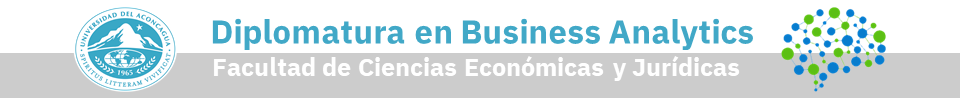

</center>

<center>
<font color="#41a8c7">
<h2><b>
Trabajo Final Módulo 11

</font>
</center>

~~~
González, Analía del Valle
~~~

**Instrucciones del Trabajo Final**

El conjunto de datos contiene información sobre los clientes de un centro comercial. Se desea utilziar un modelo de Agrupación para crear clusters y tomar una decisión comercial con cada grupo de clientes que ayude a mejorar la relación con el cliente y el monto de dinero que gastan en el centro comercial.

- Desarrollar los puntos necesarios para generar el modelo de Agrupación.
- Puede generar graficos en cualquier instancia del desarrollo.
- Al final del colab, generar una breve conclusión sobre decisiones a tomar con cada cluster.

# **Carga de módulos y datos necesarios**

###Para el tratamiento de datos

In [ ]:
import pandas as pd
import numpy as np

###Para gráficos

In [ ]:
import plotly.express as px
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns

### Para preprocesamiento de datos y modelo

In [ ]:
import sklearn
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import sklearn.metrics as metrics 
from sklearn.metrics import silhouette_score

# **Creación del DataFrame**

In [ ]:
datos = "https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Modulo_11_Agrupacion/Mall_Customers.csv"
df = pd.read_csv(datos)
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


- CustomerID - ID de cliente
- Gender - Genero
- Age - Edad
- AnualIncome - Ingreso Anual
- SpendingScore - Score de gasto en el mall

In [ ]:
df1 = df.copy()

- Analizo el DF

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   AnnualIncome   200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df1.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
pearson = df1.corr(method="pearson")

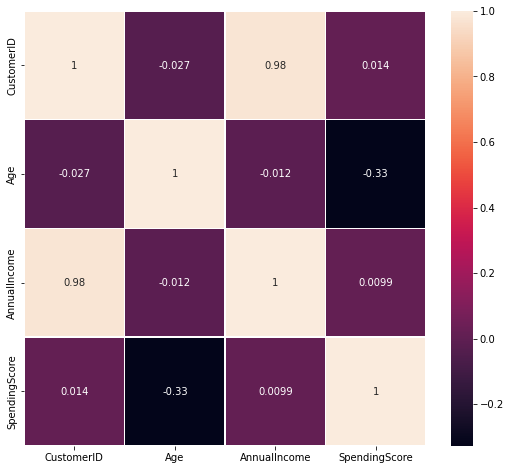

In [ ]:
plt.figure(figsize=(9,8))
sns.heatmap(pearson, 
            annot=True,
            linewidths=.5)

plt.show()

- Analizo las variables que voy a utilizar en la división de clusters, la variable Age tiene una correlación más alta con la variable SpendingScore, que con las otras variables.

In [ ]:
df1.Age.unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [ ]:
df1.SpendingScore.unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18])

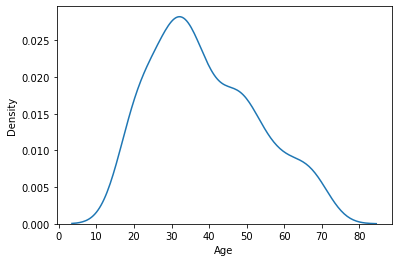

In [ ]:
sns.kdeplot (df1['Age'])

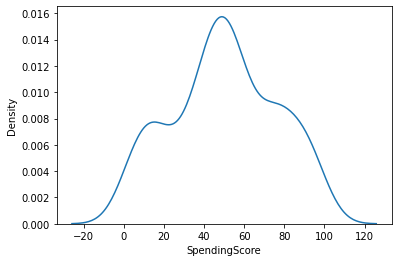

In [ ]:
sns.kdeplot (df1['SpendingScore'])

- Elimino las variables que considero no relevantes.

In [ ]:
df1= df1.drop (columns =['CustomerID','Gender','AnnualIncome'])

#N° de Clusters

In [ ]:
clusters = pd.DataFrame()
inertia = []

In [ ]:
clusters["cluster_range"] = range(1, 5)

In [ ]:
for k in clusters["cluster_range"]:
    kmeans = cluster.KMeans(n_clusters=k, random_state=1985).fit(df1)
    inertia.append(kmeans.inertia_)

In [ ]:
clusters["inertia"] = inertia

In [ ]:
clusters.inertia = round(clusters.inertia, 3)

In [ ]:
clusters.head(10)

,cluster_range,inertia
0,1,171535.500
1,2,75949.156
2,3,45840.677
3,4,28165.584


In [ ]:
fig = px.line(clusters, 
              x="cluster_range", 
              y="inertia",
              title="Metodo del codo",
              template="gridon")

fig.show()

- Según mi interpretación del gráfico, elijo 2 clusters

In [ ]:
clusters = 2

- Utilizo el algoritmo K-means.

## Algoritmo K-means

In [ ]:
km = cluster.KMeans(n_clusters=clusters, random_state=1985)

In [ ]:
km.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1985, tol=0.0001, verbose=0)

In [ ]:
centroids = km.cluster_centers_
labels = km.labels_

In [ ]:
centroids

array([[46.16521739, 32.88695652],
       [28.95294118, 73.62352941]])

- Los dos clusters tienen dos centroides, es decir, dos puntos equidistantes de los datos pertenecientes a cada cluster.

In [ ]:
centroids = pd.DataFrame(centroids, columns=['Age','SpendingScore'])
centroids

,Age,SpendingScore
0,46.165217,32.886957
1,28.952941,73.623529


In [ ]:
labels

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [ ]:
metrics.calinski_harabasz_score(df1, labels)

249.19429134176448

In [ ]:
metrics.silhouette_score(df1, labels)

0.4692341232501655

In [ ]:
metrics.davies_bouldin_score(df1, labels)

0.7722203222724408

- Las métricas muestran que no hay una buena separación entre clusters.

In [ ]:
df1['cluster'] = labels

## Graficos

In [ ]:
alt.Chart(df1).mark_circle().encode(x="Age", y="SpendingScore"	, color='cluster:N').interactive()

alt.Chart(...)

In [ ]:
alt.Chart(centroids).mark_circle(size=100).encode(x='Age', y='SpendingScore', color=alt.value('black'),
tooltip=['Age', 'SpendingScore']).interactive()

alt.Chart(...)

# **Conclusiones**

 En este caso el método K-means no es el mejor para definir la cantidad de clusters, lo demuestran las métricas y se complementa con el análisis gráfico, ya que no se muestran los 2 clusters lo suficientemente separados, diferenciados. 
- Si interpreto los gráficos, podría decir que el gráfico realizado con Altair coincide con lo que  muestra la matriz de correlación ya que existe una relación inversa entre las variables, es decir, mientras aumenta la edad de los clientes, disminuye el gasto de los mismos en el centro comercial.
- Cuando intento interpretar los clusters veo que ambos incluyen clientes que tienen entre 18 y 40 años,con la diferencia que el cluster n°0 incluye clientes que gastan menos y el n°1 incluye los que gastan más. Cuando probé hacer un modelo con tres clusters, vi que el tercero también incluía clientes con esas edades, por lo tanto consideré que no generaba cambios importantes en la interpretación, entonces decidí hacer el modelo con dos. 
- Por lo anteriormente mencionado considero que sólo se puede llegar a una conclusión general, la cual es que el centro comercial debería implementar estrategias de marketing para atraer a las personas mayores de 40 años, las cuales tienen menor score de gstos en el centro comercial.   